In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import locale ##used to convert currency string to number
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Image
import seaborn as sns
%matplotlib inline

# import & prepare the data

In [119]:
data = pd.read_csv('listings.csv')
data.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [120]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [121]:
df.describe(include=object)

,name,summary,space,instant_bookable,notes,transit,host_url,host_name,host_since,host_location,...,state,smart_location,property_type,room_type,bed_type,amenities,extra_people,neighbourhood,cancellation_policy,price
count,3818,3641,3249,3818,2212,2884,3818,3816,3816,3810,...,3818,3818,3817,3818,3818,3818,3818,3402,3818,3818
unique,3792,3478,3119,2,1999,2574,2751,1466,1380,120,...,2,7,16,3,5,3284,45,81,3,273
top,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",f,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,https://www.airbnb.com/users/show/8534462,Andrew,2013-08-30,"Seattle, Washington, United States",...,WA,"Seattle, WA",House,Entire home/apt,Real Bed,{},$0.00,Capitol Hill,strict,$150.00
freq,3,15,14,3227,39,32,46,56,51,3259,...,3817,3810,1733,2541,3657,45,2048,351,1417,162


In [122]:
df=data[['id', 'name','summary','space','instant_bookable',
       'notes', 'transit', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate',
       'host_listings_count','host_verifications', 'host_identity_verified',
       'city', 'state',
       'smart_location', 
        'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
        'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_365',
         'review_scores_rating', 'neighbourhood',
       'cancellation_policy','number_of_reviews','price']]

df.head(10)

,id,name,summary,space,instant_bookable,notes,transit,host_url,host_name,host_since,...,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,review_scores_rating,neighbourhood,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,f,NaN,NaN,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,...,2,$5.00,1,365,346,95.0,Queen Anne,moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",f,What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,...,1,$0.00,2,90,291,96.0,Queen Anne,strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",f,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,...,10,$25.00,4,30,220,97.0,Queen Anne,strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,f,NaN,NaN,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,...,1,$0.00,1,1125,143,NaN,Queen Anne,flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,Belltown,The nearest public transit bus (D Line) is 2 b...,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,...,6,$15.00,1,1125,365,92.0,Queen Anne,strict,38,$450.00
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,f,Let me know if you need anything or have sugge...,The #1 and #2 bus picks up 2-3 blocks away (di...,https://www.airbnb.com/users/show/326758,Andrew,2010-12-25,...,1,$30.00,1,6,302,95.0,Queen Anne,strict,17,$120.00
6,1909058,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,f,The room now has a mini frig to keep your favo...,The bus goes through the lower Queen Anne neig...,https://www.airbnb.com/users/show/2497928,Gary And Beth,2012-05-30,...,1,$10.00,3,14,346,99.0,Queen Anne,moderate,58,$80.00
7,856550,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...",f,There are three rentals in our back yard . If ...,"the ""D"" line runs out in front of our house .",https://www.airbnb.com/users/show/4016632,Jean-Marc,2012-10-30,...,1,$0.00,2,7,100,97.0,Queen Anne,strict,173,$60.00
8,4948745,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...",f,NaN,Bus stop to downtown directly across the stree...,https://www.airbnb.com/users/show/2166277,Aliza,2012-04-18,...,1,$0.00,3,1125,341,97.0,Queen Anne,strict,8,$90.00
9,2493658,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,f,What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,...,1,$0.00,2,365,324,97.0,Queen Anne,strict,32,$150.00


In [123]:
df.isnull().values.any()

True

In [124]:
df.isnull().sum().sum()

9929

In [125]:
df.isna().any()

id                        False
name                      False
summary                    True
space                      True
instant_bookable          False
notes                      True
transit                    True
host_url                  False
host_name                  True
host_since                 True
host_location              True
host_response_time         True
host_response_rate         True
host_acceptance_rate       True
host_listings_count        True
host_verifications        False
host_identity_verified     True
city                      False
state                     False
smart_location            False
property_type              True
room_type                 False
accommodates              False
bathrooms                  True
bedrooms                   True
beds                       True
bed_type                  False
amenities                 False
square_feet                True
guests_included           False
extra_people              False
minimum_

In [126]:
# replacing NaN values with 0
df.fillna(0, inplace=True)

#Extracting prices from the table
price = df['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
df['price']=prices

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
df2 = pd.read_csv('calendar.csv')
df2.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [128]:
df2.describe(include=object)

,date,available,price
count,1393570,1393570,934542
unique,365,2,669
top,2016-01-16,t,$150.00
freq,3818,934542,36646


In [129]:
df2.isna().any()

listing_id    False
date          False
available     False
price          True
dtype: bool

In [130]:
df2.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [131]:
# replacing NaN values with 0
df2.fillna("$0.00", inplace=True)
#df2.dropna()
#Extracting prices from the table
price2 = df2['price']
prices2=[]

#clean the data to make it float
for p in price2:
    p=float(p[1:].replace(',',''))
    prices2.append(p)

#replace the price column with the new column
df2['price']=prices2

In [132]:
#replace t with 1, and f with 0
df2["available"].replace({"t": True, "f": False}, inplace=True)

In [153]:
#drop null values in neighbourhood column bc we won't need it 
df.drop(df.loc[df['neighbourhood']==0].index, inplace=True)

# Q1: What is the Factors that has the most effect on the price?

In [133]:
correlations = df.corr()
correlations = correlations["price"].sort_values(ascending=False)
features = correlations.index[1:6]
correlations

price                   1.000000
accommodates            0.652218
bedrooms                0.626891
beds                    0.588455
bathrooms               0.512133
guests_included         0.392875
host_listings_count     0.093869
square_feet             0.078318
minimum_nights          0.017297
maximum_nights         -0.003336
availability_365       -0.015550
review_scores_rating   -0.019938
id                     -0.046289
number_of_reviews      -0.124695
Name: price, dtype: float64

In [149]:
df.corr().style.background_gradient(cmap='coolwarm')

,id,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_365,review_scores_rating,number_of_reviews,price
id,1,-0.0234667,-0.0742791,-0.0451755,-0.0605267,-0.0498692,-0.204096,-0.103058,-0.0216012,0.101529,-0.159447,-0.386588,-0.506105,-0.0462891
host_listings_count,-0.0234667,1,0.111284,0.0668451,0.0626438,0.0856092,0.00361044,-0.0592172,0.0019007,0.0226994,0.0861836,-0.031702,-0.0621363,0.0938693
accommodates,-0.0742791,0.111284,1,0.533586,0.76968,0.860714,0.0959241,0.532796,0.0170967,0.00329139,-0.0315345,0.0366482,-0.0729782,0.652218
bathrooms,-0.0451755,0.0668451,0.533586,1,0.605989,0.528864,0.0837782,0.304501,0.0065673,-0.0139407,-0.0061813,0.00748338,-0.0945498,0.512133
bedrooms,-0.0605267,0.0626438,0.76968,0.605989,1,0.75272,0.093245,0.456755,0.012084,-0.00806064,-0.0513145,-0.0100238,-0.106732,0.626891
beds,-0.0498692,0.0856092,0.860714,0.528864,0.75272,1,0.0709175,0.460561,0.00270304,-0.00919243,-0.0101474,0.014087,-0.0888105,0.588455
square_feet,-0.204096,0.00361044,0.0959241,0.0837782,0.093245,0.0709175,1,0.127395,0.00118168,-0.0281519,0.0260495,0.0219425,0.0442404,0.0783184
guests_included,-0.103058,-0.0592172,0.532796,0.304501,0.456755,0.460561,0.127395,1,-0.00165898,-0.0186373,-0.0489221,0.0592079,0.0281137,0.392875
minimum_nights,-0.0216012,0.0019007,0.0170967,0.0065673,0.012084,0.00270304,0.00118168,-0.00165898,1,0.00316117,0.00908695,0.00377604,-0.0138178,0.0172974
maximum_nights,0.101529,0.0226994,0.00329139,-0.0139407,-0.00806064,-0.00919243,-0.0281519,-0.0186373,0.00316117,1,0.00726457,-0.0395957,-0.0815782,-0.00333582


# what is the best month in availability and price

In [157]:
#Extracting just the Month from date column
df2['month'] = pd.DatetimeIndex(df2['date']).month
df2['month'] 

0           1
1           1
2           1
3           1
4           1
           ..
1393565    12
1393566    12
1393567    12
1393568     1
1393569     1
Name: month, Length: 1393570, dtype: int64

### what is the best month in availability

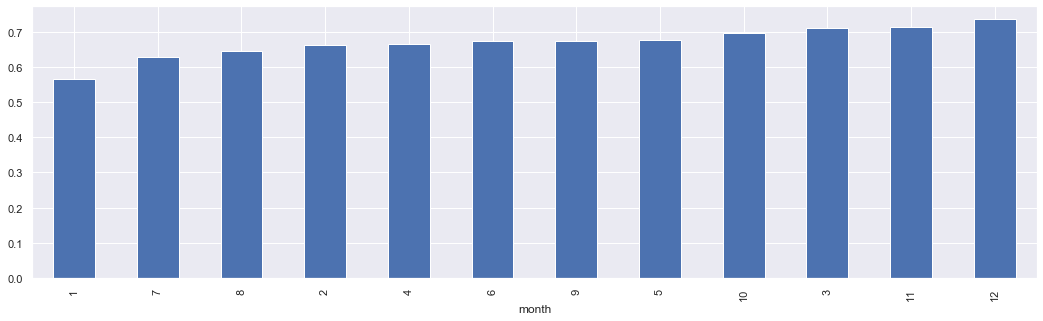

In [170]:
av=df2.groupby(['month'])['available'].mean().sort_values()
av.plot(kind='bar',figsize=(18,5))

### what is the best month in price

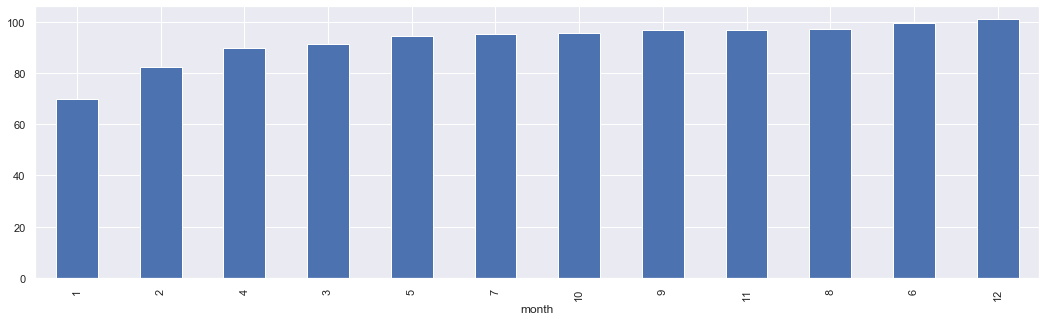

In [173]:
pr=df2.groupby(['month'])['price'].mean().sort_values()
pr.plot(kind='bar',figsize=(18,5))

# what is the best neighborhood in availability and price

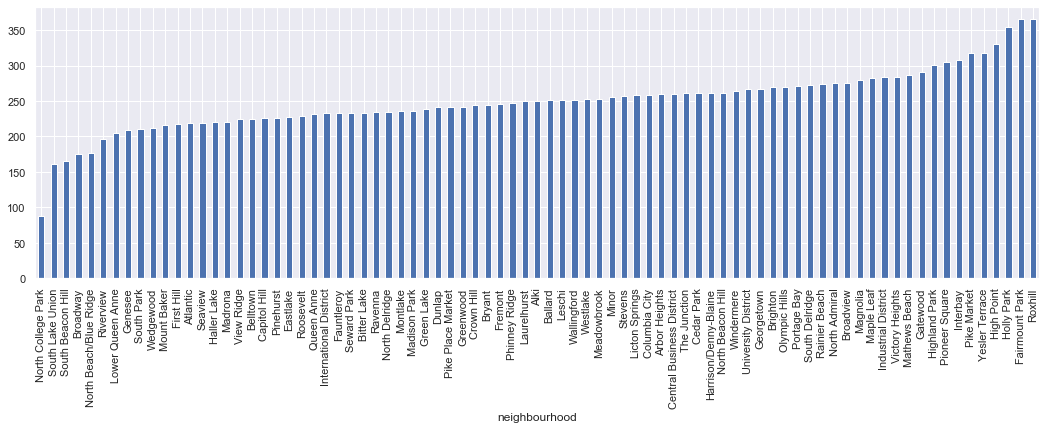

In [174]:
pr=df.groupby(['neighbourhood'])['availability_365'].mean().sort_values()
pr.plot(kind='bar', figsize=(18,5))

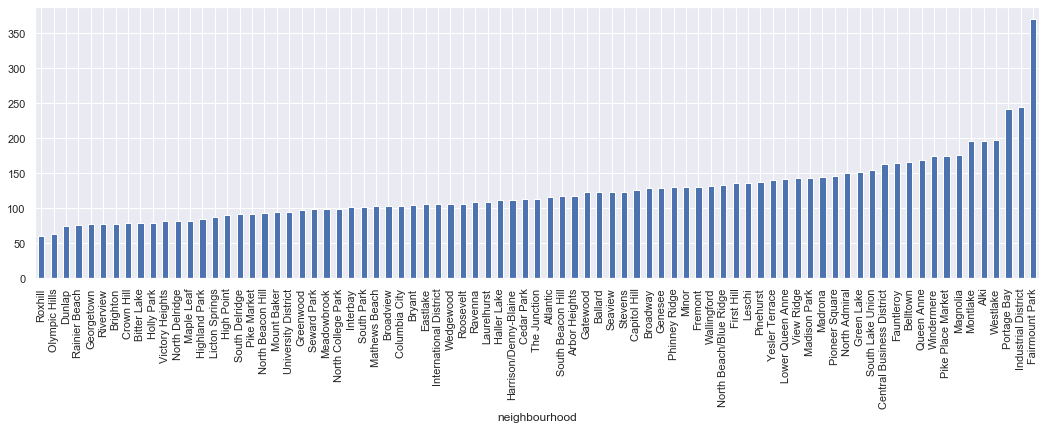

In [175]:
pr=df.groupby(['neighbourhood'])['price'].mean().sort_values()
pr.plot(kind='bar', figsize=(18,5))